# Project 3: Multiclass and Linear Models

UIC CS 412, Spring 2021

*According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually.  While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading.  This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance.  Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums.  Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you.  Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml.* 

This homework is an individual assignment for all graduate students. Undergraduate students are allowed to work in pairs and submit one homework assignment per pair. There will be no extra credit given to undergraduate students who choose to work alone. The pairs of students who choose to work together and submit one homework assignment together still need to abide by the Academic Integrity Policy and not share or receive help from others (except each other).

There are two parts to this project. The first is on multiclass reductions (50%). The second is on linear models and gradient descent (50%). There are also opportunities for extra credit (up to 25%).


## Due Date

This assignment is due at 11:59pm Thursday, March 11th. 

### Files You'll Edit

``multiclass.py``: The multiclass classification implementation you need to complete.

``gd.py``: The gradient descent file you need to edit.

``quizbowl.py``: Multiclass evaluation of the quiz bowl dataset (optional).

``predictions.txt``: This file is automatically generated as part of Part 3 (optional).

### Files you might want to look at
  
``binary.py``: Our generic interface for binary classifiers (actually
works for regression and other types of classification, too).

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``runClassifier.py``: A few wrappers for doing useful things with
classifiers, like training them, generating learning curves, etc.

``mlGraphics.py``: A few useful plotting commands

``data/*``: All of the datasets we'll use.

### What to Submit

You will hand in all of the python files listed above as a single zip file **hw3.zip** on Gradescope under *Homework 3*. In order for the autograder to run, make sure the zip file contains **all** the .py and .ipynb files, not a folder with these files. The programming part constitutes 60% of the grade for this homework. You also need to answer the questions denoted by **WU#** (and a kitten) in this notebook which are the other 40% of your homework grade. There are also up to 25% of extra credit questions denoted by **WU-EC1**, **WU-EC3**, and **WU-EC3**. When you are done, you should export **hw3.ipynb** with your answers as a PDF file **hw3WrittenPart.pdf**, upload the PDF file to Gradescope under *Homework 3 - Written Part*, and **tag each question** on Gradescope. Questions that are not tagged will not be graded.

The simplest and recommended way to export your python notebook is to select File -> Print Preview (this appears on the notebook, right under the Jupyter logo), then use the browser to print as PDF (e.g., on Chrome this appears under File->Print...->Destination "Save as PDF"). Make sure you double check your final PDF to make sure it's not missing any pieces before submitting your final version!

Your entire homework will be considered late if any of these parts are submitted late. 

#### Autograding

Your code will be autograded for technical correctness. Please **do
not** change the names of any provided functions or classes within the
code, or you will wreak havoc on the autograder. We have provided two simple test cases that you can try your code on, see ``run_tests_sample.py``. As usual, you should create more test cases to make sure your code runs correctly.

# Part 0: Autoreload 

Before we start, let's import a jupyter notebook extension called [`autoreload`](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) which would automatically reload changes to external files that you edit.
If you change something in a file and the changes are not reflected even after an autoreload, you may have to restart your jupyter notebook kernel (Kernel -> Restart).

A manual alternative to `autoreload` is to reload a particular file using `importlib`.

``import importlib
importlib.reload(dumbClassifiers)``

In [370]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1: Multiclass Classification *[30% impl, 20% writeup]*

In this section, you will explore the differences between three
multiclass-to-binary reductions: one-versus-all (OVA), all-versus-all
(AVA), and a tree-based reduction (TREE).  The evaluation will be on different datasets from 
`datasets.py`.

The classification task we'll work with is wine classification. The dataset was downloaded from allwines.com. Your job is to predict the type of wine, given the description of the wine. There are two tasks: WineData has **20** different wines, WineDataSmall is just the first five of those (sorted roughly by frequency). You can find the names of the wines both in WineData.labels as well as the file wines.names.

To start out, let's import everything and train decision "stumps" (aka depth=1 decision trees) on the large data set:

In [371]:
from sklearn.tree import DecisionTreeClassifier
import multiclass
import util
from datasets import *
import importlib
from pylab import *

h = multiclass.OVA(20, lambda: DecisionTreeClassifier(max_depth=1))
h.train(WineData.X, WineData.Y)
P = h.predictAll(WineData.Xte)
mean(P == WineData.Yte)
# 0.29499072356215211

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
training classifier for 5 versus rest
training classifier for 6 versus rest
training classifier for 7 versus rest
training classifier for 8 versus rest
training classifier for 9 versus rest
training classifier for 10 versus rest
training classifier for 11 versus rest
training classifier for 12 versus rest
training classifier for 13 versus rest
training classifier for 14 versus rest
training classifier for 15 versus rest
training classifier for 16 versus rest
training classifier for 17 versus rest
training classifier for 18 versus rest
training classifier for 19 versus rest


0.2949907235621521

That means 29% accuracy on this task. The most frequent class is:

In [372]:
print(mode(WineData.Y))
# 1
WineData.labels[1]
# Cabernet-Sauvignon

1


'Cabernet-Sauvignon'

And if you were to always predict label 1, you would get the following accuracy:

In [373]:
mean(WineData.Yte == 1)
# 0.17254174397031541

0.1725417439703154

So decision stumps producing a bit (12%) better accuracy than just predicting label 1. 

The default implementation of OVA uses decision tree confidence (probability of prediction) to weigh the votes. You can switch to zero/one predictions to see the effect:

In [374]:
P = h.predictAll(WineData.Xte, useZeroOne=True)
mean(P == WineData.Yte)
# 0.19109461966604824

0.19109461966604824

As you can see, this is markedly worse.

Switching to the smaller data set for a minute, we can train, say, depth 3 decision trees:

In [375]:
h = multiclass.OVA(5, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print(mean(P == WineDataSmall.Yte))
# 0.6017505470459519
print(mean(WineDataSmall.Yte == 1))
# 0.407002188184

training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
0.6083150984682714
0.40700218818380746


So using depth 3 trees we get an accuracy of about 60% (this number varies a bit), versus a baseline of 41%. That's not too terrible, but not great.

We can look at what this classifier is doing.

In [376]:
print(WineDataSmall.labels[0])
#'Sauvignon-Blanc'
util.showTree(h.f[0], WineDataSmall.words)
#citrus?
#-N-> lime?
#|    -N-> gooseberry?
#|    |    -N-> class 0	(356.0 for class 0, 10.0 for class 1)
#|    |    -Y-> class 1	(0.0 for class 0, 4.0 for class 1)
#|    -Y-> apple?
#|    |    -N-> class 1	(1.0 for class 0, 15.0 for class 1)
#|    |    -Y-> class 0	(2.0 for class 0, 0.0 for class 1)
#-Y-> grapefruit?
#|    -N-> flavors?
#|    |    -N-> class 1	(4.0 for class 0, 12.0 for class 1)
#|    |    -Y-> class 0	(11.0 for class 0, 5.0 for class 1)
#|    -Y-> opens?
#|    |    -N-> class 1	(0.0 for class 0, 14.0 for class 1)
#|    |    -Y-> class 0	(1.0 for class 0, 0.0 for class 1)

# It's okay to get a slightly different tree

Sauvignon-Blanc
citrus?
-N-> lime?
|    -N-> gooseberry?
|    |    -N-> class -1	(356.0 for class -1, 10.0 for class +1)
|    |    -Y-> class +1	(0.0 for class -1, 4.0 for class +1)
|    -Y-> or?
|    |    -N-> class +1	(1.0 for class -1, 15.0 for class +1)
|    |    -Y-> class -1	(2.0 for class -1, 0.0 for class +1)
-Y-> grapefruit?
|    -N-> flavors?
|    |    -N-> class +1	(4.0 for class -1, 12.0 for class +1)
|    |    -Y-> class -1	(11.0 for class -1, 5.0 for class +1)
|    -Y-> opens?
|    |    -N-> class +1	(0.0 for class -1, 14.0 for class +1)
|    |    -Y-> class -1	(1.0 for class -1, 0.0 for class +1)


This should show the tree that's associated with predicting label 0 (which is stored in h.f[0]). The 1s mean "likely to be Sauvignon-Blanc" and the 0s mean "likely not to be".

Now, go in and complete the AVA implementation in `multiclass.py`. Make sure you follow the corrected version of the algorithm from the class slides, not the one from the book. You should be able to train an AVA model on the small data set by:

In [394]:
h = multiclass.AVA(5, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print(mean(P == WineDataSmall.Yte))

training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier for 4 versus 0
training classifier for 4 versus 1
training classifier for 4 versus 2
training classifier for 4 versus 3
0.05689277899343545
citrus?
-N-> lime?
|    -N-> refreshing?
|    |    -N-> class -1	(187.0 for class -1, 9.0 for class +1)
|    |    -Y-> class +1	(0.0 for class -1, 5.0 for class +1)
|    -Y-> class +1	(0.0 for class -1, 15.0 for class +1)
-Y-> class +1	(0.0 for class -1, 31.0 for class +1)


Next, you must implement a 
tree-based reduction MCTree in `multiclass.py`. Most of train is given to you, but predict you
must do all on your own. There is a `makeBalancedTree` function to help you:

In [378]:
t = multiclass.makeBalancedTree(range(5))
print(t)
# [[0 1]] [2 [3 4]]]
print(t.isLeaf)
# False
print(t.getRight())
# [2 [3 4]]
print(t.getRight().getLeft())
# 2
print(t.getRight().getLeft().isLeaf)
# True

[[0 1] [2 [3 4]]]
False
[2 [3 4]]
2
True


You should be able to train a MCTree model by:

In [387]:
h = multiclass.MCTree(t, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)

training classifier for [0, 1] versus [2, 3, 4]
training classifier for [0] versus [1]
training classifier for [2] versus [3, 4]
training classifier for [3] versus [4]


In [490]:
t = multiclass.makeBalancedTree(range(5))
h = multiclass.MCTree(t, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print(np.mean(P == WineDataSmall.Yte))

training classifier for [0, 1] versus [2, 3, 4]
training classifier for [0] versus [1]
training classifier for [2] versus [3, 4]
training classifier for [3] versus [4]
0.0787746170678337


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU1 (10%):
Answer A, B, C for both OVA and AVA.

(A) Using WineDataSmall, answer the following: What words are most indicative of being Sauvignon-Blanc? Which words are most indicative of not being Cabernet-Sauvignon? What about Pinot-Grigio (label=4)? Note that indicative words describe a specific wine (not others).

(B) Train depth 3 decision trees on the full WineData task (with 20 labels). What accuracy do you get? How long does this take (in seconds)? One of my least favorite wines is Shiraz -- what words are indicative of this?

(C) Compare the accuracy using zero-one predictions versus using confidence on the full WineData. How much difference does it make?

In [402]:
# WU1 CODE HERE
import time

print("A using OVA")
h = multiclass.OVA(5, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
print("\nSauvignon-Blanc")
util.showTree(h.f[0], WineDataSmall.words)
print('"citrus" and "grapefruit" both being present combined with a lack of "honey"')
print('are the most indicative of Sauvignon-Blanc')
print("\nCabernet-Sauvignon")
util.showTree(h.f[1], WineDataSmall.words)
print('"tannins" and "salmon" are most indicative of not being Cabernet-Sauvignon')
print("\nPinot-Grigio")
util.showTree(h.f[4], WineDataSmall.words)
print('"apple" "straw" and "bright" are most indicative of Pinot-Grigio')
print('while the absense of "apple" "paired" and "friends" are most indicative of')
print('not being Pinot-Grigio')


print("\n\nB using OVA")

start_time = time.time()

h = multiclass.OVA(20, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineData.X, WineData.Y)
P = h.predictAll(WineData.Xte)
print("\nFull Wine Data confidence: " + str(mean(P == WineData.Yte)))

print("--- %s seconds ---" % (time.time() - start_time))

# print(WineData.labels[8])
util.showTree(h.f[8], WineData.words)
print("\nWe get a YTest accuracry of 37% (0.36641929499072357)")
print("It takes about 1.6 seconds to accomplish this")

print('"characters" "dark" and the absence of "it" are most indicative of being Shiraz')

print('"barossa" and "brooding" are most indicative of not being Shiraz')

print("\n\nC using OVA")
P = h.predictAll(WineData.Xte, True)
print("\nFull Wine Data zeroOne: " + str(mean(P == WineData.Yte)))

print("without zeroOne confidence = 0.3682745825602968 while zeroOne = 0.2504638218923933")
print("Just about a 10% difference in accuracy, which is sizeable")


print("\n\nA using AVA")
h = multiclass.AVA(5, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineDataSmall.X, WineDataSmall.Y)
print("\nSauvignon-Blanc")
util.showTree(h.f[1][0], WineDataSmall.words)
print('\n"Citrus" is by far the most indicative of being Sauvignon-Blanc')
print("\nCabernet-Sauvignon")
util.showTree(h.f[2][0], WineDataSmall.words)
print('"crip" "red" are most indicative of not being Cabernet-Sauvignon')
print("\nPinot-Grigio")
util.showTree(h.f[4][0], WineDataSmall.words)
print('"apple" "paste" "warm" all being absent are most indicative of being Pinot-Grigio')
print('"apple" being present and "bright" being absent are most indicative of not being Pinot-Grigio')


print("\n\nB using AVA")
start_time = time.time()

h = multiclass.AVA(20, lambda: DecisionTreeClassifier(max_depth=3))
h.train(WineData.X, WineData.Y)
P = h.predictAll(WineData.Xte)
print("\nFull Wine Data confidence: " + str(mean(P == WineData.Yte)))
print("--- %s seconds ---" % (time.time() - start_time))
util.showTree(h.f[8][0], WineData.words)
print('"dark" being present is most indicative of not being Shiraz')


print("\n\nC using AVA")

P = h.predictAll(WineData.Xte, True)
print("\nFull Wine Data zeroOne: " + str(mean(P == WineData.Yte)))
print("without zeroOne confidence = 0.027829313543599257 while zeroOne = 0.24768089053803338")
print("Just about a 2% difference in accuracy, which is negligible")

A using OVA
training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest

Sauvignon-Blanc
citrus?
-N-> lime?
|    -N-> gooseberry?
|    |    -N-> class -1	(356.0 for class -1, 10.0 for class +1)
|    |    -Y-> class +1	(0.0 for class -1, 4.0 for class +1)
|    -Y-> apple?
|    |    -N-> class +1	(1.0 for class -1, 15.0 for class +1)
|    |    -Y-> class -1	(2.0 for class -1, 0.0 for class +1)
-Y-> grapefruit?
|    -N-> flavors?
|    |    -N-> class +1	(4.0 for class -1, 12.0 for class +1)
|    |    -Y-> class -1	(11.0 for class -1, 5.0 for class +1)
|    -Y-> 2010?
|    |    -N-> class +1	(0.0 for class -1, 14.0 for class +1)
|    |    -Y-> class -1	(1.0 for class -1, 0.0 for class +1)
"citrus" and "grapefruit" both being present combined with a lack of "honey"
are the most indicative of Sauvignon-Blanc

Cabernet-Sauvignon
tannins?
-N-> blackberry?
|    -N-> 

training classifier for 12 versus 7
training classifier for 12 versus 8
training classifier for 12 versus 9
training classifier for 12 versus 10
training classifier for 12 versus 11
training classifier for 13 versus 0
training classifier for 13 versus 1
training classifier for 13 versus 2
training classifier for 13 versus 3
training classifier for 13 versus 4
training classifier for 13 versus 5
training classifier for 13 versus 6
training classifier for 13 versus 7
training classifier for 13 versus 8
training classifier for 13 versus 9
training classifier for 13 versus 10
training classifier for 13 versus 11
training classifier for 13 versus 12
training classifier for 14 versus 0
training classifier for 14 versus 1
training classifier for 14 versus 2
training classifier for 14 versus 3
training classifier for 14 versus 4
training classifier for 14 versus 5
training classifier for 14 versus 6
training classifier for 14 versus 7
training classifier for 14 versus 8
training classifier for

[WU1 ANSWER HERE]

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU2 (10%):
Using decision trees of constant depth for each
classifier (but you choose it as well as you can!), train AVA, OVA and
MCTree (using balanced trees) for the WineDataSmall. Which one produces best recall and why? Answer the same for WineData.

In [411]:
# WU2 CODE HERE

print("AVA error bound = 2(K-1)e")
print("OVA error bound = (K-1)e")
print("MCTree error bound = (log_2 K)e")
print("As the error bound of the MCTree scales logarithmically with K, it is natural that the confidence level is better given the same K")
print("This applies both to WineDataSmall and WineData.  In fact the size of the dataset doesn't much affect the confidence level after a point, with K having much stronger influence")

print("\n\nTraining Small Wine Data OVA using depth=5")
h = multiclass.OVA(5, lambda: DecisionTreeClassifier(max_depth=5))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print("Small Wine Data OVA confidence: " + str(np.mean(P == WineDataSmall.Yte)))

print("\n\nTraining Small Wine Data AVA using depth=5")
h = multiclass.AVA(5, lambda: DecisionTreeClassifier(max_depth=5))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print("Small Wine Data AVA confidence: " + str(np.mean(P == WineDataSmall.Yte)))

print("\n\nTraining Small Wine Data MCTree using depth=5")
t = multiclass.makeBalancedTree(range(5))
h = multiclass.MCTree(t, lambda: DecisionTreeClassifier(max_depth=5))
h.train(WineDataSmall.X, WineDataSmall.Y)
P = h.predictAll(WineDataSmall.Xte)
print("Small Wine Data MCTree confidence: " + str(np.mean(P == WineDataSmall.Yte)))

print("Which one produces best recall and why? Answer the same for WineData.")
print("On Small Wine Data MCTree produces the best confidence")


print("\n\nTraining Full Wine Data OVA using depth=5")
h = multiclass.OVA(5, lambda: DecisionTreeClassifier(max_depth=5))
h.train(WineData.X, WineData.Y)
P = h.predictAll(WineData.Xte)
print("Full Wine Data OVA confidence: " + str(np.mean(P == WineData.Yte)))

print("\nTraining Full Wine Data AVA using depth=5")
h = multiclass.AVA(5, lambda: DecisionTreeClassifier(max_depth=5))
h.train(WineData.X, WineData.Y)
P = h.predictAll(WineData.Xte)
print("Full Wine Data AVA confidence: " + str(np.mean(P == WineData.Yte)))

print("\nTraining Full Wine Data MCTree using depth=5")
t = multiclass.makeBalancedTree(range(5))
h = multiclass.MCTree(t, lambda: DecisionTreeClassifier(max_depth=5))
h.train(WineData.X, WineData.Y)
P = h.predictAll(WineData.Xte)
print("Full Wine Data MCTree confidence: " + str(np.mean(P == WineData.Yte)))

AVA error bound = 2(K-1)e
OVA error bound = (K-1)e
MCTree error bound = (log_2 K)e
As the error bound of the MCTree scales logarithmically with K, it is natural that the confidence level is better given the same K
This applies both to WineDataSmall and WineData.  In fact the size of the dataset doesn't much affect the confidence level after a point, with K having much stronger influence


Training Small Wine Data OVA using depth=5
training classifier for 0 versus rest
training classifier for 1 versus rest
training classifier for 2 versus rest
training classifier for 3 versus rest
training classifier for 4 versus rest
Small Wine Data OVA confidence: 0.6017505470459519


Training Small Wine Data AVA using depth=5
training classifier for 1 versus 0
training classifier for 2 versus 0
training classifier for 2 versus 1
training classifier for 3 versus 0
training classifier for 3 versus 1
training classifier for 3 versus 2
training classifier for 4 versus 0
training classifier for 4 versus 1

[WU2 ANSWER HERE]

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU-EC1 ExtraCredit (10%):
Build a better tree (any way you want) other
than the balanced binary tree. Fill in your code for this in
`getMyTreeForWine`, which defaults to a balanced tree. It should get
at least 5% lower absolute error to get the extra credit. Describe what you
did.

[YOUR WU-EC1 ANSWER HERE]

# Part 2: Gradient Descent and Linear Classification *[30% impl, 20% writeup]*

To get started with linear models, we will implement a generic
gradient descent method.  This should go in `gd.py`, which
contains a single (short) function: `gd`. This takes five
parameters: the function we're optimizing, it's gradient, an initial
position, a number of iterations to run, and an initial step size.

In each iteration of gradient descent, we will compute the gradient
and take a step in that direction, with step size `eta`.  We
will have an *adaptive* step size, where `eta` is computed
as `stepSize` divided by the square root of the iteration
number (counting from one).

Once you have an implementation running, we can check it on a simple
example of minimizing the function `x^2`:

In [416]:
import gd
gd.gd(lambda x: x**2, lambda x: 2*x, 10, 10, 0.2)
#(1.0034641051795872, array([ 100.        ,   36.        ,   18.5153247 ,   10.95094653,
#          7.00860578,    4.72540613,    3.30810578,    2.38344246,
#          1.75697198,    1.31968118,    1.00694021]))

(1.0034641051795872,
 array([100.        ,  36.        ,  18.5153247 ,  10.95094653,
          7.00860578,   4.72540613,   3.30810578,   2.38344246,
          1.75697198,   1.31968118,   1.00694021]))

You can see that the "solution" found is about 1, which is not great
(it should be zero!), but it's better than the initial value of ten!
If yours is going up rather than going down, you probably have a sign
error somewhere!

We can let it run longer and plot the trajectory:

1.0841010700891128e+21


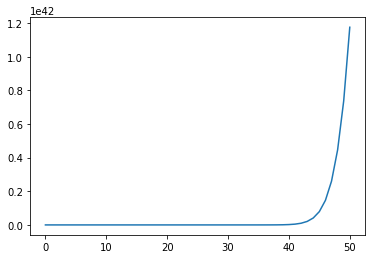

In [491]:
import matplotlib.pyplot as plt
x, trajectory = gd.gd(lambda x: x**2, lambda x: 2*x, 10, 50, 8)
print(x)
# 0.003645900464603937
plt.plot(trajectory)
plt.show()

It's now found a value close to zero and you can see that the
objective is decreasing by looking at the plot.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU3 (5%):
Find a few values of step size where it converges and
a few values where it diverges.  Where does the threshold seem to
be?

[Your WU3 answer here]

The solution converges to 0.0 at a limit of 0.5 (step size)

The solution diverges to positive infinity at step sizes above 10, it is related to the numIters, as halving the value to 50 causes divergence to infinity at stepSize=8

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU4 (10%):
Come up with a *non-convex* univariate
optimization problem.  Plot the function you're trying to minimize and
show two runs of `gd`, one where it gets caught in a local
minimum and one where it manages to make it to a global minimum.  (Use
different starting points to accomplish this.)

If you implemented it well, this should work in multiple dimensions,
too:

[0.0036459  0.00182295]


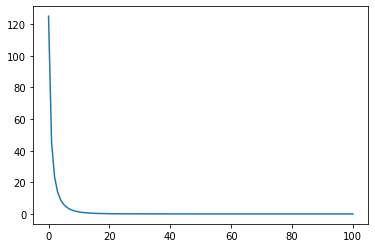

In [492]:
x, trajectory = gd.gd(lambda x: linalg.norm(x)**2, lambda x: 2*x, array([10,5]), 100, 0.2)
print(x)
# array([ 0.0036459 ,  0.00182295])
plt.plot(trajectory)
plt.show()

Our generic linear classifier implementation is
in `linear.py`.  The way this works is as follows.  We have an
interface `LossFunction` that we want to minimize.  This must
be able to compute the loss for a pair `Y` and `Yhat`
where, the former is the truth and the latter are the predictions.  It
must also be able to compute a gradient when additionally given the
data `X`.  This should be all you need for these.

There are two loss function stubs: `SquaredLoss` (which is
implemented for you!), `LogisticLoss`
(you'll have to implement.  My suggestion is to hold off
implementing it until you have the linear classifier
working.

The `LinearClassifier` class is a stub implemention of a
generic linear classifier with an l2 regularizer.  It
is *unbiased* so all you have to take care of are the weights.
Your implementation should go in `train`, which has a handful
of stubs.  The idea is to just pass appropriate functions
to `gd` and have it do all the work.  See the comments inline
in the code for more information.
 
Once you've implemented the function evaluation and gradient, we can
test this.  We'll begin with a very simple 2D example data set so that
we can plot the solutions.  We'll also start with *no
regularizer* to help you figure out where errors might be if you
have them.  (You'll have to import `mlGraphics` to make this
work.)

Training accuracy 0.9, test accuracy 0.9
w=array([232.37004781,   0.        ])
NOTE: default code logic gave a divide-by-zero because weights are inited to zeros


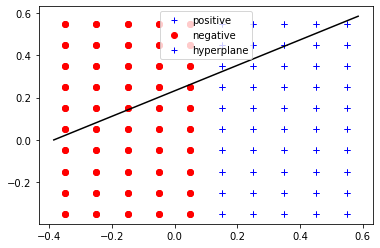

NOTE: default code logic gave a divide-by-zero because weights are inited to zeros


In [537]:
import linear
import datasets
import mlGraphics
import runClassifier
f = linear.LinearClassifier({'lossFunction': linear.SquaredLoss(), 'lambda': 0, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.TwoDAxisAligned)

# Training accuracy 0.91, test accuracy 0.86
print(f)
# w=array([ 2.73466371, -0.29563932])
mlGraphics.plotLinearClassifier(f, datasets.TwoDAxisAligned.X, datasets.TwoDAxisAligned.Y)
print("NOTE: default code logic gave a divide-by-zero because weights are inited to zeros")
plt.show()
print("NOTE: default code logic gave a divide-by-zero because weights are inited to zeros")

Note that even though this data is clearly linearly separable,
the *unbiased* classifier is unable to perfectly separate it.

If we change the regularizer, we'll get a slightly different
solution:

In [528]:
f = linear.LinearClassifier({'lossFunction': linear.SquaredLoss(), 'lambda': 10, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.TwoDAxisAligned)
# Training accuracy 0.9, test accuracy 0.86
print(f)
# w=array([ 1.30221546, -0.06764756])

Training accuracy 0.9, test accuracy 0.9
w=array([2.5, 0. ])


As expected, the weights are *smaller*.

Now, we can try different loss function.  Implement logistic loss.  Here are some simple test cases:

In [500]:
f = linear.LinearClassifier({'lossFunction': linear.LogisticLoss(), 'lambda': 10, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.TwoDDiagonal)
# Training accuracy 0.99, test accuracy 0.86
print(f)
# w=array([ 0.29809083,  1.01287561])

Training accuracy 0.99, test accuracy 0.86
w=array([0.78, 2.5 ])


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU5 (5%):
For each of the loss functions, train a model on the
binary version of the wine data (called WineDataBinary) and evaluate
it on the test data. You should use lambda=2 in all cases. Which works
best? For that best model, look at the learned weights. Find
the *words* corresponding to the weights with the greatest
positive value and those with the greatest negative value (this is
like [LAB3]). Hint: look at WineDataBinary.words to get the id-to-word
mapping. List the top 5 positive and top 5 negative and explain.

[Your WU5 answer here]

In [586]:
print("\nSquared Loss")
f = linear.LinearClassifier({'lossFunction': linear.SquaredLoss(), 'lambda': 2, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.WineDataBinary)

print("\nLogistic Loss")
f = linear.LinearClassifier({'lossFunction': linear.LogisticLoss(), 'lambda': 2, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.WineDataBinary)
print("\nI know Logistic Loss is the best because Math tells me so")
print("Highest weight was: " + str(np.max(f.weights)))
idx = np.argmax(f.weights)
print("Highest weight index was: " + str(idx))
print("So that means the most impactful word was: " + str(WineDataBinary.words[idx]))

print("Top 5 heaviest weighted words")
print(str([WineDataBinary.words[val] for val in np.argsort(-f.weights)[:5]]))

print("\nBottom 5 least weighted words")
print(str([WineDataBinary.words[val] for val in np.argsort(f.weights)[:5]]))

print("\nThe top 5 and bottom 5 words are either all ones that show up at the top of the classifers earlier in the assignment")
print("i.e. very impactful to choosing Wines based on their presence for Top 5")
print("\nfor bottom 5, 'tannins' was related heavily to Shiraz, which was mentioned is the Prof's lease favorite Win")
print("the rest of the bottom 5, with the exception of 'black' can be considered as useless filler words: 'is', 'this', etc")


print("\nHinge Loss")
f = linear.LinearClassifier({'lossFunction': linear.HingeLoss(), 'lambda': 2, 'numIter': 100, 'stepSize': 0.5})
runClassifier.trainTestSet(f, datasets.WineDataBinary)


Squared Loss
Training accuracy 0.757085020242915, test accuracy 0.6863468634686347

Logistic Loss
Training accuracy 0.757085020242915, test accuracy 0.6863468634686347

I know Logistic Loss is the best because Math tells me so
Highest weight was: 15.5
Highest weight index was: 177
So that means the most impactful word was: citrus
Top 5 heaviest weighted words
['citrus', 'crisp', 'lime', 'grapefruit', 'tropical']

Bottom 5 least weighted words
['tannins', 'black', 'wine', 'is', 'this']

The top 5 and bottom 5 words are either all ones that show up at the top of the classifers earlier in the assignment
i.e. very impactful to choosing Wines based on their presence for Top 5

for bottom 5, 'tannins' was related heavily to Shiraz, which was mentioned is the Prof's lease favorite Win
the rest of the bottom 5, with the exception of 'black' can be considered as useless filler words: 'is', 'this', etc

Hinge Loss
Training accuracy 0.757085020242915, test accuracy 0.6863468634686347


# Part 3: Classification with Many Classes *[0% -- up to 15% extra credit]*

Finally, we'll do multiclass classification **using Scikit-learn** functionality. You can find the documentation here: http://scikit-learn.org/stable/modules/multiclass.html.

Quiz bowl is a game in which two teams compete head-to-head to answer questions from different areas of knowledge. It lets players interrupt the reading of a question when they know the answer. The goal here is to see how well a classifier performs in predicting the `Answer` of a question when a different portion of the question is revealed.

Here's an example question from the development data:

*206824,dev,History,Alan Turing,"This man and Donald Bayley created a secure voice communications machine called ""Delilah"". ||| The Chinese Room Experiment was developed by John Searle in response to one of this man's namesake tests. ||| He showed that the halting problem was undecidable. ||| He devised a bomb with Gordon Welchman that found the settings of an Enigma machine. ||| One of this man's eponymous machines which can perform any computing task is his namesake ""complete."" Name this man, whose eponymous test is used to determine if a machine can exhibit behavior indistinguishable from that of a human."*

The more of the question you get, the easier the problem becomes.

The default code below just runs OVA and AVA on top of a linear SVM (it might take a few seconds):

In [486]:
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from numpy import *
import datasets
import importlib

importlib.reload(datasets)

if not datasets.Quizbowl.loaded:
    datasets.loadQuizbowl()

print('\n\nRUNNING ON EASY DATA\n')
    
print('training ova')
X = datasets.QuizbowlSmall.X
Y = datasets.QuizbowlSmall.Y
ova = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, Y)
print('predicting ova')
ovaDevPred = ova.predict(datasets.QuizbowlSmall.Xde)
print('error = {0}'.format(mean(ovaDevPred != datasets.QuizbowlSmall.Yde)))

print('training ava')
ava = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, Y)
print('predicting ava')
avaDevPred = ava.predict(datasets.QuizbowlSmall.Xde)
print('error = {0}'.format(mean(avaDevPred != datasets.QuizbowlSmall.Yde)))

print('\n\nRUNNING ON HARD DATA\n')
    
print('training ova')
X = datasets.QuizbowlHardSmall.X
Y = datasets.QuizbowlHardSmall.Y
ova = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, Y)
print('predicting ova')
ovaDevPred = ova.predict(datasets.QuizbowlHardSmall.Xde)
print('error = {0}'.format(mean(ovaDevPred != datasets.QuizbowlHardSmall.Yde)))

print('training ava')
ava = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, Y)
print('predicting ava')
avaDevPred = ava.predict(datasets.QuizbowlHardSmall.Xde)
print('error = {0}'.format(mean(avaDevPred != datasets.QuizbowlHardSmall.Yde)))

savetxt('predictions.txt', avaDevPred)

Loading Quizbowl dataset...

total labels: 2370
unique features: 8416
total training examples: 8845


Loading QuizbowlSmall dataset...

total labels: 31
unique features: 8416
total training examples: 361


Loading QuizbowlHard dataset...

total labels: 2370
unique features: 4132
total training examples: 8845


Loading QuizbowlHardSmall dataset...

total labels: 31
unique features: 4132
total training examples: 361


RUNNING ON EASY DATA

training ova
predicting ova
error = 0.2934131736526946
training ava
predicting ava
error = 0.218562874251497


RUNNING ON HARD DATA

training ova
predicting ova
error = 0.5958083832335329
training ava
predicting ava
error = 0.5538922155688623


When you run the code above, you should see some statistics of the loaded datasets and the following error rates on two of the datasets `QuizbowlSmall` and `QuizbowlHardSmall` using OVA and AVA:

```
RUNNING ON EASY DATA

training ova
predicting ova
error = 0.293413
training ava
predicting ava
error = 0.218563


RUNNING ON HARD DATA

training ova
predicting ova
error = 0.595808
training ava
predicting ava
error = 0.553892
```

This is running on a shrunken version of the data (that only contains answers that occur at least 20 times in the data).

The first ("easy") version is when you get to see the entire question. The second ("hard") version is when you only get to use the first two sentences. It's clearly significantly harder to answer!

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU-EC2 (5%):

Your task is to achieve the lowest possible error on the development set for `QuizbowlSmall` and `QuizbowlHardSmall`. You will get 5% extra credit for getting lower error (by at least absolute 1%) on *either* dataset than the errors presented above (21.86% for `QuizbowlSmall` and 55.39% for `QuizbowlHardSmall`). 

You're free to use the training data in any way you want, but you must include your code in `quizbowl.py`, submit your predictions file(s), and a writeup here that says what you did, in order to receive the extra credit. The script `quizbowl.py` includes a command in the last line that saves predictions to a text file `predictions.txt`. You need to edit this line to rename the file to either `predictionsQuizbowlSmall.txt` or `predictionsQuizbowlHardSmall.txt` dependent on the dataset: that's what you upload for the EC. 





[YOUR WU-EC2 WRITEUP HERE] 

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU-EC3 (up to 10%):


Additionally, you can get extra credit for providing the lowest-error solution on the full versions of the easy and hard problems, `Quizbowl` and `QuizbowlHard` in comparison to your classmates' solutions. There will be two separate (hidden) leaderboards for the two respective datasets. You will receive 5% if your solution is the best for the respective dataset (first place), 3% for second place and 1% for third. You are welcome to compete in both leaderboards which lets you earn up to 10% (5 + 5) extra credits for securing first place in both. We will reveal the top three scores for each dataset after the submission period is over. Note that this problem is much harder due to the larger number of class labels. A simple majority label classifier has an error of 99.89%.

You're free to use the training data in any way you want, but you must include your code in `quizbowl.py`, submit your predictions file(s) (`predictionsQuizbowl.txt` and/or `predictionsQuizbowlHard.txt`), and a writeup here that says what you did, in order to receive the extra credit.



[YOUR WU-EC3 WRITEUP HERE] 